In [1]:
# Importing packages
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import lines
from scipy.stats import linregress as linregress
import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns
colors = sns.color_palette()

home = os.path.expanduser('~')
resultsdir = opj(home, 'Dropbox', 'ResMas_UvA', 'Thesis', 'Git', 'Analysis_results')

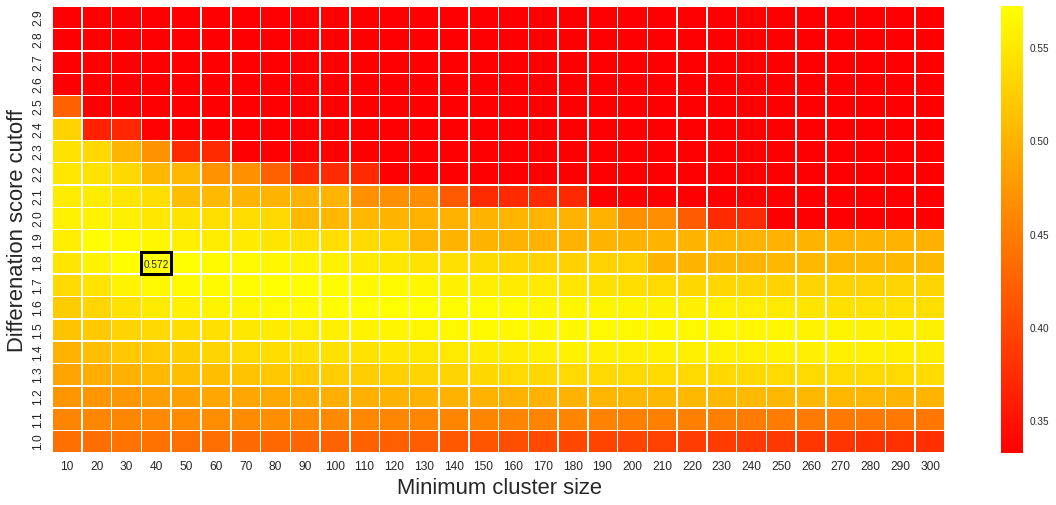

In [125]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'mean_cluster_optimization_results.csv')
data = pd.read_csv(filepath, sep='\t')
data_pivot = pd.pivot_table(data, index='zval', columns='cluster_min', values='score').sort(ascending=False)

np_data = data_pivot.as_matrix()
max_idx = np.unravel_index(np.argmax(np_data), np_data.shape)

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0, size=12)
plt.yticks(rotation=0, size=12)

ax = sns.heatmap(data_pivot, cmap='autumn', vmin=0.3333, linewidths=.1)
ax.set_ylabel('Differenation score cutoff', fontsize=22)
ax.set_xlabel('Minimum cluster size', fontsize=22)
ax.add_patch(matplotlib.patches.Rectangle((max_idx[1], np_data.shape[0]-max_idx[0]-1), 
                                          1, 1, fill=False, color='black', lw=3))
ax.text(max_idx[1] + 0.1, np_data.shape[0]-max_idx[0]-1+ 0.3, '%.3f' % np.max(np_data), size=10)